In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle


from scipy.stats import sem
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotx
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['train_size'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "target": out['target']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['baseline']['xgb_metrics']['accuracy'], 
        'f1_macro': out['baseline']['xgb_metrics']['f1_macro'],
        'f1_micro': out['baseline']['xgb_metrics']['f1_micro'],
        'kappa': out['baseline']['xgb_metrics']['kappa'],
        "num_classes": out['num_classes'],
        "target": out['target']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['baseline']['tabpfn_metrics']['accuracy'], 
        'f1_macro': out['baseline']['tabpfn_metrics']['f1_macro'],
        'f1_micro': out['baseline']['tabpfn_metrics']['f1_micro'],
        'kappa': out['baseline']['tabpfn_metrics']['kappa'],
        "num_classes": out['num_classes'],
        "target": out['target']
    }

    
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [6]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [7]:
res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,target
0,10,1.0,0.492,0.485071,0.492,-0.016,2,"(logKH_CO2, CO2 Henry coefficient)"
1,10,1.0,0.600,0.563822,0.600,0.200,2,"(logKH_CH4, CH4 Henry coefficient)"


In [8]:
grouped_res = res.groupby(['num_classes', "target", 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [9]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'target', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [10]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'target', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [13]:
grouped_res.loc[2,:]

frac_valid         accuracy      \
                                                    mean std sem     mean std   
target                             train_size                                   
(logKH_CH4, CH4 Henry coefficient) 10                1.0 NaN NaN    0.600 NaN   
(logKH_CO2, CO2 Henry coefficient) 10                1.0 NaN NaN    0.492 NaN   

                                                   f1_macro         f1_micro  \
                                              sem      mean std sem     mean   
target                             train_size                                  
(logKH_CH4, CH4 Henry coefficient) 10         NaN  0.563822 NaN NaN    0.600   
(logKH_CO2, CO2 Henry coefficient) 10         NaN  0.485071 NaN NaN    0.492   

                                                       kappa          
                                              std sem   mean std sem  
target                             train_size                         
(logKH_CH4, CH4 Henry coefficient) 10         NaN NaN  0.200 NaN NaN  
(logKH_CO2, CO2 Henry coefficient) 10         NaN NaN -0.016 NaN NaN

In [14]:
grouped_xgboost_res

accuracy          \
                                                              mean std sem   
num_classes target                             train_size                    
2           (logKH_CH4, CH4 Henry coefficient) 10              0.5 NaN NaN   
            (logKH_CO2, CO2 Henry coefficient) 10              0.5 NaN NaN   

                                                           f1_macro          \
                                                               mean std sem   
num_classes target                             train_size                     
2           (logKH_CH4, CH4 Henry coefficient) 10          0.333333 NaN NaN   
            (logKH_CO2, CO2 Henry coefficient) 10          0.333333 NaN NaN   

                                                          f1_micro          \
                                                              mean std sem   
num_classes target                             train_size                    
2           (logKH_CH4, CH4 Henry coefficient) 10              0.5 NaN NaN   
            (logKH_CO2, CO2 Henry coefficient) 10              0.5 NaN NaN   

                                                          kappa          
                                                           mean std sem  
num_classes target                             train_size                
2           (logKH_CH4, CH4 Henry coefficient) 10           0.0 NaN NaN  
            (logKH_CO2, CO2 Henry coefficient) 10           0.0 NaN NaN

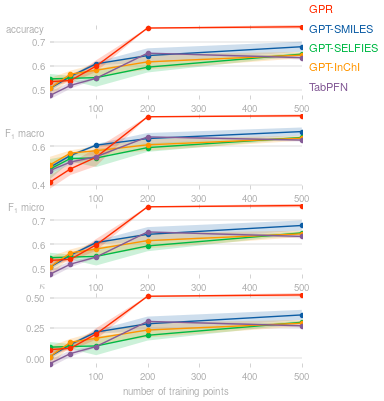

In [29]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2, 'smiles', :].index,
            grouped_res.loc[2, 'smiles', :][metric]['mean'],
            marker='o',
            label='GPT-SMILES',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'smiles', :].index,
            grouped_res.loc[2, 'smiles', :][metric]['mean'] - grouped_res.loc[2, 'smiles', :][metric]['sem'],
            grouped_res.loc[2, 'smiles', :][metric]['mean'] + grouped_res.loc[2, 'smiles', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2, 'selfies', :].index,
            grouped_res.loc[2, 'selfies', :][metric]['mean'],
            marker='o',
            label='GPT-SELFIES',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'selfies', :].index,
            grouped_res.loc[2, 'selfies', :][metric]['mean'] - grouped_res.loc[2, 'selfies', :][metric]['sem'],
            grouped_res.loc[2, 'selfies', :][metric]['mean'] + grouped_res.loc[2, 'selfies', :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_res.loc[2, 'inchi', :].index,
            grouped_res.loc[2, 'inchi', :][metric]['mean'],
            marker='o',
            label='GPT-InChI',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'inchi', :].index,
            grouped_res.loc[2, 'inchi', :][metric]['mean'] - grouped_res.loc[2, 'inchi', :][metric]['sem'],
            grouped_res.loc[2, 'inchi', :][metric]['mean'] + grouped_res.loc[2, 'inchi', :][metric]['sem'],
            alpha=0.2,
        )



        ax[i].plot(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'],
            marker='o',
            label='GPR'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['sem'],
            grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['sem'],
            grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )


    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig('lipophilicity-classification_results_binary.pdf', bbox_inches='tight')

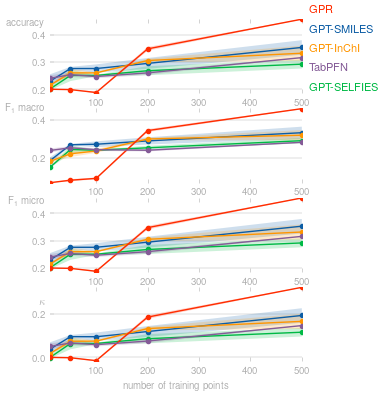

In [30]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5, 'smiles', :].index,
            grouped_res.loc[5, 'smiles', :][metric]['mean'],
            marker='o',
            label='GPT-SMILES',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'smiles', :].index,
            grouped_res.loc[5, 'smiles', :][metric]['mean'] - grouped_res.loc[5, 'smiles', :][metric]['sem'],
            grouped_res.loc[5, 'smiles', :][metric]['mean'] + grouped_res.loc[5, 'smiles', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[5, 'selfies', :].index,
            grouped_res.loc[5, 'selfies', :][metric]['mean'],
            marker='o',
            label='GPT-SELFIES',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'selfies', :].index,
            grouped_res.loc[5, 'selfies', :][metric]['mean'] - grouped_res.loc[5, 'selfies', :][metric]['sem'],
            grouped_res.loc[5, 'selfies', :][metric]['mean'] + grouped_res.loc[5, 'selfies', :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_res.loc[5, 'inchi', :].index,
            grouped_res.loc[5, 'inchi', :][metric]['mean'],
            marker='o',
            label='GPT-InChI',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'inchi', :].index,
            grouped_res.loc[5, 'inchi', :][metric]['mean'] - grouped_res.loc[5, 'inchi', :][metric]['sem'],
            grouped_res.loc[5, 'inchi', :][metric]['mean'] + grouped_res.loc[5, 'inchi', :][metric]['sem'],
            alpha=0.2,
        )

        
        ax[i].plot(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'],
            marker='o',
            label='GPR'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['sem'],
            grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['sem'],
            grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)
    
    fig.savefig('lipophilicity-classification_results_5_class.pdf', bbox_inches='tight')